__Strategy:__
1. Define inputs and outputs
2. Make some input output pairs covering as many edge cases as you can
3. THink of a solution. Write it in plain English
4. Implement it & test it for all cases
5. Remove inefficiencies 
6. Apply right technique and repeat steps 3-6

__Problem:__
We need to write a program to find the position of a given number in a list of numbers arranged in decreasing order. We also need to minimize the number of times we access elements from the list.

- inputs - cards, query
- outputs - index (i.e. location)


In [2]:
tests = []


# normal case
test = {
    'input': {
        'cards': [13, 11, 10, 7, 4, 3, 1, 0], 
        'query': 7
    },
    'output': 3
}

tests.append(test)

# query number is repeated
tests.append({
    'input': {
        'cards': [13, 11, 7, 7, 7, 3, 1, 0], 
        'query': 7
    },
    'output': 2
})


# numbers near query are repeated
tests.append({
    'input': {
        'cards': [13, 13, 11, 7, 3, 3, 1, 0], 
        'query': 7
    },
    'output': 3
})


# query not in list
tests.append({
    'input': {
        'cards': [13, 11, 10, 7, 4, 3, 1, 0], 
        'query': 6
    },
    'output': -1
})


# empty cards list
tests.append({
    'input': {
        'cards': [], 
        'query': 7
    },
    'output': -1
})

# repetition of query number such that all numbers are query num
tests.append({
    'input': {
        'cards': [7,7,7,7,7,7,7,7,7], 
        'query': 7
    },
    'output': 0
})


# first element is query
tests.append({
    'input': {
        'cards': [13, 11, 10, 7, 4, 3, 1, 0], 
        'query': 13
    },
    'output': 0
})


# last element is query
tests.append({
    'input': {
        'cards': [13, 11, 10, 7, 4, 3, 1, 0], 
        'query': 0
    },
    'output': 7
})


# single element in list
tests.append({
    'input': {
        'cards': [13], 
        'query': 13
    },
    'output': 0
})


## add some more
tests.append({
    'input': {
        'cards': [13, 11, 10, 7, 4, 3, 1, 0],
        'query': 1
    },
    'output': 6
})

# query is the first element
tests.append({
    'input': {
        'cards': [4, 2, 1, -1],
        'query': 4
    },
    'output': 0
})

# query is the last element
tests.append({
    'input': {
        'cards': [3, -1, -9, -127],
        'query': -127
    },
    'output': 3
})

# cards contains just one element, query
tests.append({
    'input': {
        'cards': [6],
        'query': 6
    },
    'output': 0 
})

# cards does not contain query 
tests.append({
    'input': {
        'cards': [9, 7, 5, 2, -9],
        'query': 4
    },
    'output': -1
})

# cards is empty
tests.append({
    'input': {
        'cards': [],
        'query': 7
    },
    'output': -1
})


# numbers can repeat in cards
tests.append({
    'input': {
        'cards': [8, 8, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0],
        'query': 3
    },
    'output': 7
})


# query occurs multiple times
tests.append({
    'input': {
        'cards': [8, 8, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0],
        'query': 6
    },
    'output': 2
})

In [3]:
tests

[{'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}, 'output': 3},
 {'input': {'cards': [13, 11, 7, 7, 7, 3, 1, 0], 'query': 7}, 'output': 2},
 {'input': {'cards': [13, 13, 11, 7, 3, 3, 1, 0], 'query': 7}, 'output': 3},
 {'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 6}, 'output': -1},
 {'input': {'cards': [], 'query': 7}, 'output': -1},
 {'input': {'cards': [7, 7, 7, 7, 7, 7, 7, 7, 7], 'query': 7}, 'output': 0},
 {'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 13}, 'output': 0},
 {'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 0}, 'output': 7},
 {'input': {'cards': [13], 'query': 13}, 'output': 0},
 {'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}, 'output': 6},
 {'input': {'cards': [4, 2, 1, -1], 'query': 4}, 'output': 0},
 {'input': {'cards': [3, -1, -9, -127], 'query': -127}, 'output': 3},
 {'input': {'cards': [6], 'query': 6}, 'output': 0},
 {'input': {'cards': [9, 7, 5, 2, -9], 'query': 4}, 'output': -1},
 {'input': {'cards': [

__solution in plain english__
1. Pick the middle card
2. If middle card is less than query: get the left half if greater right or if equal break
3. Repeat until solution is found

In [27]:
def locate_card(cards, query):
    lower = 0
    upper = len(cards)-1 ### 
    while len(cards)>0 and upper>=lower:
        middle = (lower+upper)//2
        #print(middle)
        if cards[middle] == query:
            return middle
        elif cards[middle]< query:
            upper = middle-1
        elif cards[middle] > query:
            lower = middle + 1
    return -1

In [28]:
for test in tests:
    out = locate_card(**test['input'])
    print('Answer: ', out, ' Is it correct?: ', out==test['output'])

Answer:  3  Is it correct?:  True
Answer:  3  Is it correct?:  False
Answer:  3  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  4  Is it correct?:  False
Answer:  0  Is it correct?:  True
Answer:  7  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  6  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  3  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  7  Is it correct?:  True
Answer:  7  Is it correct?:  False


Remove inefficiencies.

Failure happens when there is repitition

In [29]:
def locate_card(cards, query):
    lower = 0
    upper = len(cards)-1 
    while len(cards)>0 and upper>=lower:
        middle = (lower+upper)//2
        #print(middle)
        if cards[middle] == query:
            middle = get_first(cards, middle)
            return middle
        elif cards[middle]< query:
            upper = middle-1
        elif cards[middle] > query:
            lower = middle + 1
    return -1

def get_first(cards, middle):
    while middle>0 and cards[middle-1]==cards[middle]:
        middle=middle-1
    return middle

In [30]:
for test in tests:
    out = locate_card(**test['input'])
    print('Answer: ', out, ' Is it correct?: ', out==test['output'])

Answer:  3  Is it correct?:  True
Answer:  2  Is it correct?:  True
Answer:  3  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  7  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  6  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  3  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  7  Is it correct?:  True
Answer:  2  Is it correct?:  True


In [31]:
%timeit locate_card(**tests[0]['input'])

612 ns ± 3.37 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


For Linear search it was: 637 ns ± 11.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

__Benefit of Binary Search over Linear Search becomes more evident when the number of cards are large.__

In [33]:
test1 = {
    'input': {
        'cards': list(range(1000, -1200, -1)), 
        'query': -1100
    },
    'output': 2100
}


%timeit locate_card(**test1['input'])

2.91 µs ± 43.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


For Linear search it was: 263 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

In [32]:
test2 = {
    'input': {
        'cards': list(range(1000000, -1200, -1)), 
        'query': -1100
    },
    'output': 1001100
}


%timeit locate_card(**test2['input'])

6.13 µs ± 85.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


For Linear search it was: 127 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

In [34]:
test3 = {
    'input': {
        'cards': list(range(100000000, -1200, -1)), 
        'query': -1100
    },
    'output': 100001100
}


%timeit locate_card(**test3['input'])

8.49 µs ± 65.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


For Linear search it was: 13.1 s ± 302 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    
    

__worst case__ - N -> N/2 -> N/4 ... -> N/2^k

__time complexity - O(log N)__ 

N -> N/2 -> N/4 ... -> N/2^k

Final array length = 1

N/2^k = 1

k = log N

:: <font color='red'> O(log N) </font>

__space complexity__ - num variables we need -  `position` -> 1 (in our case):: <font color='red'> O(1) </font>

__Recommended Solution__

## Generic Binary Search

Strategy: 
1. Come up with a condition to determine whether the answer lies before, after or at a given position
2. Retrieve midpoint and middle element of the list
3. If this is the answer,  return the middle position
4. If answer lies before it, repeat search with first half of the list
5. If answer lies after it, repeat the search with second half of the list


In [36]:
## Generic binary search function
def binary_search(lo, hi, condition):
    while lo<=hi:
        mid = (lo+hi)//2
        result = condition(mid)
        if result == 'found':
            return mid
        elif result == 'left':
            hi = mid - 1
        else:
            lo = mid + 1
    return -1
            

In [39]:
def locate_card(cards, query):
    def condition(mid):
        if cards[mid]==query:
            if mid>0 and cards[mid-1]==query:
                return 'left'
            else:
                return 'found'
        elif cards[mid]<query:
            return 'left'
        else:
            return 'right'
    return binary_search(0, len(cards)-1, condition)

In [40]:
for test in tests:
    out = locate_card(**test['input'])
    print('Answer: ', out, ' Is it correct?: ', out==test['output'])

Answer:  3  Is it correct?:  True
Answer:  2  Is it correct?:  True
Answer:  3  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  7  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  6  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  3  Is it correct?:  True
Answer:  0  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  -1  Is it correct?:  True
Answer:  7  Is it correct?:  True
Answer:  2  Is it correct?:  True


In [41]:
test3 = {
    'input': {
        'cards': list(range(100000000, -1200, -1)), 
        'query': -1100
    },
    'output': 100001100
}


%timeit locate_card(**test3['input'])

9.33 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


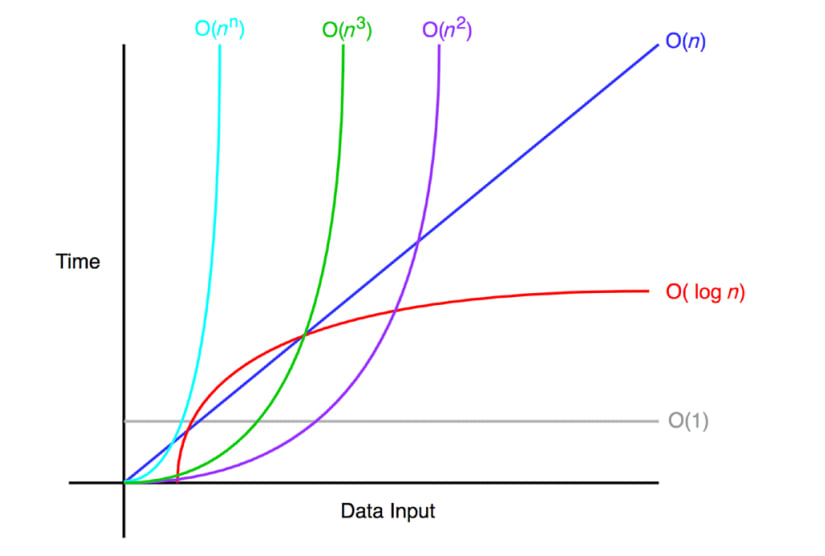